## Classification using Tree

In [6]:
from sklearn import tree
from sklearn.datasets import load_iris


# Frist parametere should always be the features and other must be targets
# X = Features, Y = Target variable
X,y = load_iris(return_X_y = True)
x = X
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

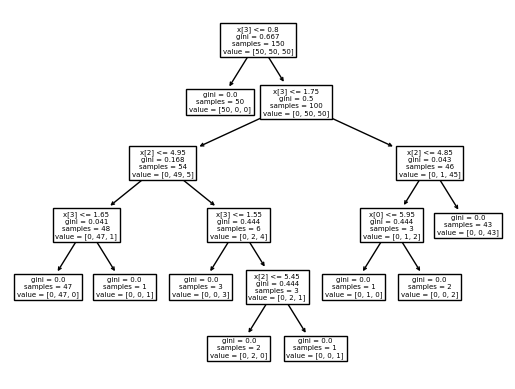

In [9]:
tree.plot_tree(clf)

#### Gini Index
* Used to Measure Impurity of data
* Only used in classification Algorithms

<img src="../Images/Screenshot 2024-07-17 085839.png"></img>


#### Entropy 
* Used to Measure Impurity of data

<img src="../Images/Screenshot 2024-07-17 085847.png"></img>

* Shannon entropy is a measure of information. when we
* only have dataset and have not constructed a decision tree, our entropy (A measure of missing information) is high and our information is low. we need to gain information and decrease entropy (decrease the amount of missing knowledge about our target in this case). To understand this equation

Values of desiction tree
*   childern_left[ i ] : id of left child of node i or -1 leaf node
*   children_right[ i ] : id of right child of node i or -1 is lead node
*   feature[ i ] : = feature used for splitting node i
*   threshold[ i ] :   the number of training samples reaching node i
* impurity[ i ] : the impurity at node i 
*   weighred_n_node_samples[i]: the weighted number of training samples reaching node i
* value[i, j, k]: the summary of the training samples that reached node i for output and class k for regression tree class set to 1

In [36]:
clf = clf.fit(x_train, y_train)
node_indicator = clf.decision_path(x_test)
leaf_id = clf.apply(x_test)
feature = clf.tree_.feature
threshold = clf.tree_.threshold
value = clf.tree_.value
sample_id = 0
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:node_indicator.indptr[sample_id + 1]]

for node_id in node_index:
    if leaf_id[sample_id] == node_id:
        continue

    if x_test[sample_id, feature[node_id]]<= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">="
    print(
        "decision node {node} : (x_test[{sample}, {feature}] = {value}) "
        "{inequality} {threshold})".format(
            node=node_id,
            sample=sample_id,
            feature=feature[node_id],
            value=x_test[sample_id, feature[node_id]],
            inequality=threshold_sign,
            threshold=threshold[node_id],
        )
    )

decision node 0 : (x_test[0, 3] = 1.2) >= 0.800000011920929)
decision node 2 : (x_test[0, 3] = 1.2) <= 1.75)
decision node 3 : (x_test[0, 2] = 4.0) <= 5.049999952316284)
decision node 4 : (x_test[0, 3] = 1.2) <= 1.6500000357627869)


#### Principle of component analysis
*   linear dimensionality rediction using singular value decomposition of data to project it to lower dimensional space the input data centered but not scaled for each feature group before applying the SVD

* n_componentsint, float or ‘mle’, default=None
Number of components to keep. if n_components is not set all components are kept:


In [ ]:
n_components == min(n_samples, n_features)

[[-2.68412563  0.31939725 -0.02791483]
 [-2.71414169 -0.17700123 -0.21046427]
 [-2.88899057 -0.14494943  0.01790026]
 [-2.74534286 -0.31829898  0.03155937]
 [-2.72871654  0.32675451  0.09007924]
 [-2.28085963  0.74133045  0.16867766]
 [-2.82053775 -0.08946138  0.25789216]
 [-2.62614497  0.16338496 -0.02187932]
 [-2.88638273 -0.57831175  0.02075957]
 [-2.6727558  -0.11377425 -0.19763272]
 [-2.50694709  0.6450689  -0.07531801]
 [-2.61275523  0.01472994  0.10215026]
 [-2.78610927 -0.235112   -0.20684443]
 [-3.22380374 -0.51139459  0.06129967]
 [-2.64475039  1.17876464 -0.15162752]
 [-2.38603903  1.33806233  0.2777769 ]
 [-2.62352788  0.81067951  0.13818323]
 [-2.64829671  0.31184914  0.02666832]
 [-2.19982032  0.87283904 -0.12030552]
 [-2.5879864   0.51356031  0.21366517]
 [-2.31025622  0.39134594 -0.23944404]
 [-2.54370523  0.43299606  0.20845723]
 [-3.21593942  0.13346807  0.29239675]
 [-2.30273318  0.09870885  0.03912326]
 [-2.35575405 -0.03728186  0.12502108]
 [-2.50666891 -0.14601688

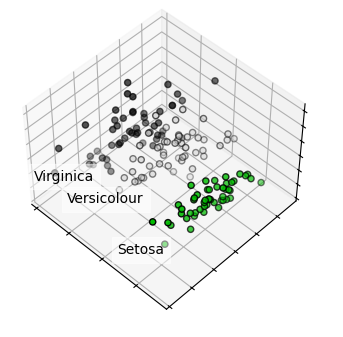

In [43]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np

from sklearn import datasets, decomposition

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

print(X)
for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

### Incremental PCA
* Incremental principal component analysis (IPCA) is typically used as a replacement for principal component analysis (PCA) when the dataset to be decomposed is too large to fit in memory. IPCA builds a low-rank approximation for the input data using an amount of memory which is independent of the number of input data samples. It is still dependent on the input data features, but changing the batch size allows for control of memory usage.

* This example serves as a visual check that IPCA is able to find a similar projection of the data to PCA (to a sign flip), while only processing a few samples at a time. This can be considered a “toy example”, as IPCA is intended for large datasets which do not fit in main memory, requiring incremental approaches.

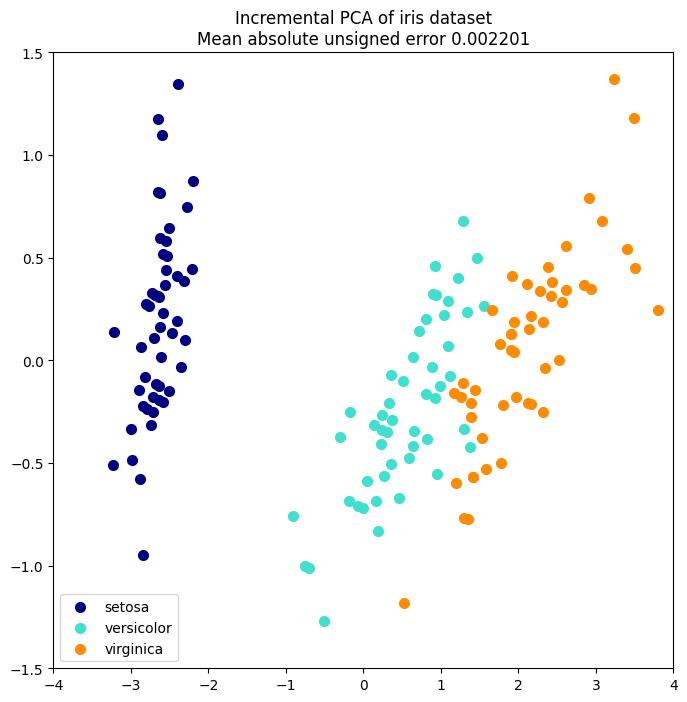

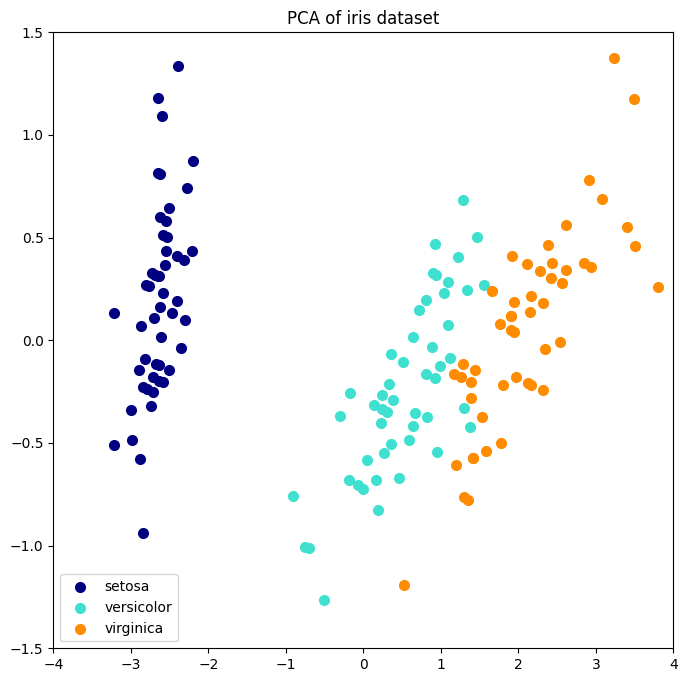

In [44]:
# Authors: Kyle Kastner
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA

iris = load_iris()
X = iris.data
y = iris.target

n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

colors = ["navy", "turquoise", "darkorange"]

for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(
            X_transformed[y == i, 0],
            X_transformed[y == i, 1],
            color=color,
            lw=2,
            label=target_name,
        )

    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of iris dataset\nMean absolute unsigned error %.6f" % err)
    else:
        plt.title(title + " of iris dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-4, 4, -1.5, 1.5])

plt.show()

In [58]:
import pandas as pd
import numpy as np
data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv",header=0)
data.head()

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [62]:
colum = {'0.00632':'CRIM','18.00':'ZN','2.310':'INDUS','0':'CHAS','0.5380':'NOX','6.5750':'RM','65.20':'AGE','4.0900':'DIS','1':'RAD','296.0':'TAX','15.30':'PTRATIO','396.90':'B','4.98':'LSTAT','24.00':'MEDV'}  

In [69]:
data.rename(columns=colum,inplace=True)

In [64]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [73]:
x = data.iloc[:,:12].values
y = data.iloc[:,:-1].values

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=7)

In [78]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)